In [2]:
from lbm.datasets.housing_prices import Preprocessor
import pandas as pd

label_cols = ['median_house_value', 'median_income']
processor = Preprocessor(include_ocean_proximity=True, label_cols=label_cols)
train_loader, val_loader, test_loader = processor.get_loaders()

feature_names = processor.get_feature_names()

df1 = pd.DataFrame(columns=feature_names)
df2 = pd.DataFrame(columns=label_cols)
for X, Y in train_loader:
    for x in X:
        df1.loc[len(df1)] = x.numpy()
    for y in Y:
        df2.loc[len(df2)] = y.numpy()
display(df1)
display(df2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.330002,37.570000,43.0,2543.0,621.0,1301.0,606.0,0.0,0.0,0.0,0.0,1.0
1,-118.220001,33.810001,41.0,726.0,166.0,602.0,183.0,0.0,0.0,0.0,0.0,1.0
2,-121.279999,38.700001,14.0,5827.0,1246.0,2578.0,1038.0,0.0,1.0,0.0,0.0,0.0
3,-117.769997,33.840000,5.0,4380.0,715.0,1913.0,741.0,1.0,0.0,0.0,0.0,0.0
4,-118.059998,33.990002,38.0,862.0,178.0,484.0,176.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16341,-121.360001,38.669998,17.0,2770.0,684.0,1471.0,624.0,0.0,1.0,0.0,0.0,0.0
16342,-118.949997,34.810001,30.0,2817.0,604.0,1089.0,412.0,0.0,1.0,0.0,0.0,0.0
16343,-118.940002,35.380001,26.0,4800.0,831.0,2365.0,743.0,0.0,1.0,0.0,0.0,0.0
16344,-118.410004,34.090000,37.0,2716.0,302.0,809.0,291.0,1.0,0.0,0.0,0.0,0.0


,median_house_value,median_income
0,297900.0,3.0546
1,218200.0,4.6908
2,96200.0,2.5000
3,168000.0,3.3472
4,187500.0,2.5488
...,...,...
16341,115600.0,3.0139
16342,59500.0,1.6575
16343,44600.0,1.7109
16344,500001.0,5.0106


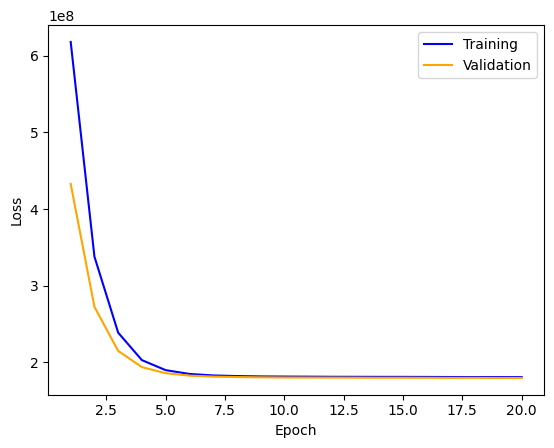

In [3]:
from lbm.models import Linear
from lbm.workflow import train_and_validate
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import numpy as np

means, stds = processor.get_z_score()
model = Linear(len(feature_names), 2, means, stds)

optimizer = optim.SGD(model.parameters(), weight_decay=0.01)
loss_fn = nn.MSELoss()
train_losses, val_losses = train_and_validate(
    model,
    train_loader,
    val_loader,
    optimizer,
    loss_fn,
    epochs=20
)
plt.plot(np.arange(1, len(train_losses) + 1), train_losses, label='Training', color='blue')
plt.plot(np.arange(1, len(val_losses) + 1), val_losses, label='Validation', color='orange')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()